### DATASET Analyses


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import os
import sklearn.preprocessing as sk_prep

In [2]:
def load_data(file_name):
    data = pd.read_csv(file_name)
    y = data['emotion'].values
    x = data[' pixels'].str.split(' ', expand=True)
    x = x.astype(int).values
    return x, y

def vec2img(vec):
    return np.reshape(vec,(48, 48))

def standardize_data(data):
    return (data - data.mean(axis=0)) / data.std(axis=0)

def split_data(x, y, ratio):
    n = len(x)
    
    ix_train = int(ratio[0] * n)
    ix_valid = ix_train + int(ratio[1] * n)
    
    x_train = x[: ix_train, :]
    y_train = y[: ix_train, ]

    x_valid = x[ix_train : ix_valid, :]
    y_valid = y[ix_train : ix_valid, ]
    
    x_test = x[ix_valid:, :]
    y_test = y[ix_valid:, ]


    return x_train, y_train, x_valid, y_valid, x_test, y_test



In [18]:

x, y = load_data('../dataset/icml_face_data.csv')


In [19]:
emotion_dict = {0: 'Angry', 
                1: 'Disgust', 
                2: 'Fear',
                3: 'Happy', 
                4: 'Sad',
                5: 'Surprise',
                6: 'Neutral'}

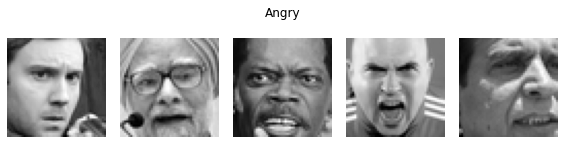

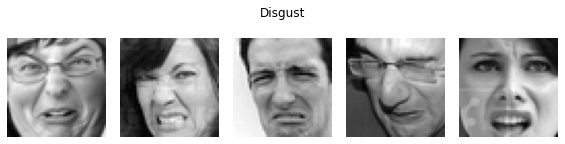

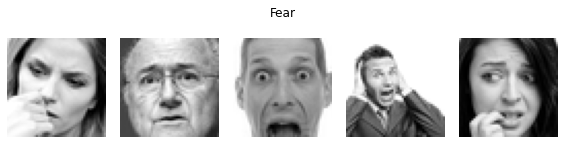

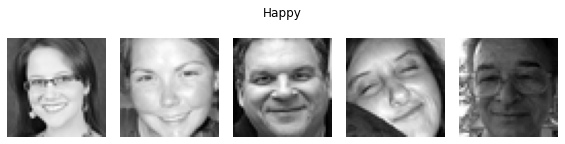

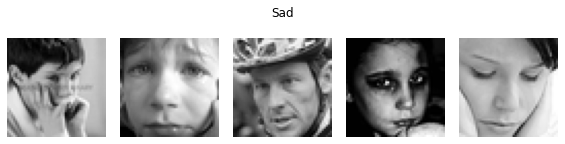

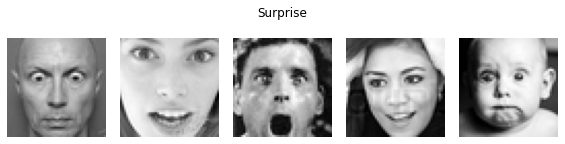

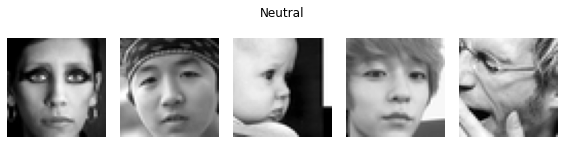

In [20]:
for e in set(y):
    emotion = x[y == e][:5]
    fig, ax = plt.subplots(1, 5, figsize=(8, 2))
    fig.suptitle(emotion_dict[e])
    for i in range(emotion.shape[0]):
        im = vec2img(emotion[i])
        ax[i].imshow(im,cmap='gray')
        ax[i].axis('off')
    plt.tight_layout()

In [21]:
x_train, y_train, x_valid, y_valid, x_test, y_test = split_data(x, y, ratio=(0.8, 0, 0.2))


### different preprocessing 

#### standardization

In [22]:
standard_scaler = sk_prep.StandardScaler()
standard_scaler.fit(x_train)
x_train_std = standard_scaler.transform(x_train)
x_test_std = standard_scaler.transform(x_test)

clf = LogisticRegression(random_state=0,
                         max_iter=500,
                         penalty='l2').fit(x_train_std, y_train)#, solver='saga')


C:\Users\michele.morra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print('train set accuracy =', clf.score(x_train_std, y_train))
print('train set accuracy =', clf.score(x_test_std, y_test))

prediction_test = {}
prediction_train = {}
for i in emotion_dict:
      prediction_train[i] = clf.score(x_train_std[y_train == i], y_train[y_train == i])
      prediction_test[i] = clf.score(x_test_std[y_test == i], y_test[y_test == i])
display(prediction_train)
display(prediction_test)

train set accuracy = 0.4990769445121739
train set accuracy = 0.3424352187238785


{0: 0.3932415519399249,
 1: 0.4059633027522936,
 2: 0.3707590920185502,
 3: 0.6759528759528759,
 4: 0.4209109730848861,
 5: 0.5909807631661936,
 6: 0.45861027190332326}

{0: 0.18893528183716074,
 1: 0.17117117117117117,
 2: 0.185546875,
 3: 0.5569334836527621,
 4: 0.27425821972734565,
 5: 0.4536702767749699,
 6: 0.29278183292781834}

#### robust standardization

In [24]:

robust_scaler = sk_prep.RobustScaler()
robust_scaler.fit(x_train)
x_train_robust = robust_scaler.transform(x_train)
x_test_robust = robust_scaler.transform(x_test)


clf = LogisticRegression(max_iter=500, 
                         random_state=0, 
                         penalty='l2').fit(x_train_robust, y_train)
print('train set accuracy =', clf.score(x_train_robust, y_train))
print('train set accuracy =', clf.score(x_test_robust, y_test))

prediction_test = {}
prediction_train = {}
for i in emotion_dict:
      prediction_train[i] = clf.score(x_train_robust[y_train == i], y_train[y_train == i])
      prediction_test[i] = clf.score(x_test_robust[y_test == i], y_test[y_test == i])
display(prediction_train)
display(prediction_test)


C:\Users\michele.morra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train set accuracy = 0.49841513114354385
train set accuracy = 0.34424630816383395


{0: 0.38923654568210264,
 1: 0.39908256880733944,
 2: 0.36953868684403224,
 3: 0.6760914760914761,
 4: 0.42422360248447205,
 5: 0.5928729107537054,
 6: 0.45498489425981875}

{0: 0.18789144050104384,
 1: 0.18018018018018017,
 2: 0.18359375,
 3: 0.560315670800451,
 4: 0.27906976744186046,
 5: 0.46329723225030084,
 6: 0.28872668288726683}

#### normalization

In [25]:
normalization = sk_prep.Normalizer()
normalization.fit(x_train_robust)
x_train_robust_norm = normalization.transform(x_train_robust)
x_test_robust_norm = normalization.transform(x_test_robust)

clf = LogisticRegression(max_iter=500, 
                         random_state=0, 
                         penalty='l2').fit(x_train_robust_norm, y_train)
print('train set accuracy =', clf.score(x_train_robust_norm, y_train))
print('train set accuracy =', clf.score(x_test_robust_norm, y_test))

prediction_test = {}
prediction_train = {}
for i in emotion_dict:
      prediction_train[i] = clf.score(x_train_robust_norm[y_train == i], y_train[y_train == i])
      prediction_test[i] = clf.score(x_test_robust_norm[y_test == i], y_test[y_test == i])
display(prediction_train)
display(prediction_test)


train set accuracy = 0.4127277160472326
train set accuracy = 0.3867372527166342


{0: 0.1932415519399249,
 1: 0.0,
 2: 0.17647058823529413,
 3: 0.711988911988912,
 4: 0.332712215320911,
 5: 0.522232734153264,
 6: 0.39355488418932527}

{0: 0.1336116910229645,
 1: 0.0,
 2: 0.1484375,
 3: 0.6978579481397971,
 4: 0.31275060144346434,
 5: 0.5018050541516246,
 6: 0.3657745336577453}

In [26]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', 
                    verbose=True, 
                    activation='logistic', 
                    max_iter=500)

clf.fit(x_train_robust_norm, y_train)
print('train set accuracy =', clf.score(x_train_robust_norm, y_train))
print('train set accuracy =', clf.score(x_test_robust_norm, y_test))


Iteration 1, loss = 1.85350799
Iteration 2, loss = 1.81160429
Iteration 3, loss = 1.80998572
Iteration 4, loss = 1.80964784
Iteration 5, loss = 1.80940521
Iteration 6, loss = 1.80926336
Iteration 7, loss = 1.80912997
Iteration 8, loss = 1.80894259
Iteration 9, loss = 1.80887691
Iteration 10, loss = 1.80867678
Iteration 11, loss = 1.80862460
Iteration 12, loss = 1.80839124
Iteration 13, loss = 1.80824928
Iteration 14, loss = 1.80807203
Iteration 15, loss = 1.80796568
Iteration 16, loss = 1.80779142
Iteration 17, loss = 1.80770624
Iteration 18, loss = 1.80755141
Iteration 19, loss = 1.80737726
Iteration 20, loss = 1.80720194
Iteration 21, loss = 1.80710712
Iteration 22, loss = 1.80691185
Iteration 23, loss = 1.80676493
Iteration 24, loss = 1.80658585
Iteration 25, loss = 1.80650944
Iteration 26, loss = 1.80630825
Iteration 27, loss = 1.80618865
Iteration 28, loss = 1.80592349
Iteration 29, loss = 1.80591711
Iteration 30, loss = 1.80556886
Iteration 31, loss = 1.80553479
Iteration 32, los

#### class weight balanced

In [43]:
normalization = sk_prep.Normalizer()
normalization.fit(x_train_robust)
x_train_robust_norm = normalization.transform(x_train_robust)
x_test_robust_norm = normalization.transform(x_test_robust)

clf = LogisticRegression(max_iter=500, 
                         random_state=0, 
                         penalty='l2',
                         class_weight='balanced').fit(x_train_robust_norm, y_train)
print('train set accuracy =', clf.score(x_train_robust_norm, y_train))
print('train set accuracy =', clf.score(x_test_robust_norm, y_test))

prediction_test = {}
prediction_train = {}
for i in emotion_dict:
      prediction_train[i] = clf.score(x_train_robust_norm[y_train == i], y_train[y_train == i])
      prediction_test[i] = clf.score(x_test_robust_norm[y_test == i], y_test[y_test == i])
display(prediction_train)
display(prediction_test)


train set accuracy = 0.3750391863178794
train set accuracy = 0.3450821955976595


{0: 0.27083854818523156,
 1: 0.6811926605504587,
 2: 0.187210153771052,
 3: 0.4856548856548857,
 4: 0.30269151138716355,
 5: 0.6076947335225481,
 6: 0.34803625377643505}

{0: 0.20772442588726514,
 1: 0.5405405405405406,
 2: 0.138671875,
 3: 0.4813979706877114,
 4: 0.27425821972734565,
 5: 0.5728038507821901,
 6: 0.32765612327656124}

### Test NN SKLEARN

### Accuracy analyses

<AxesSubplot:>

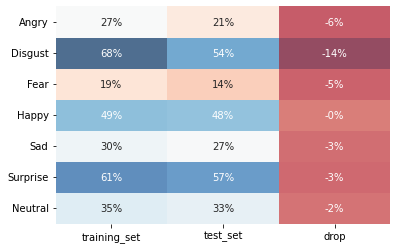

In [44]:
accuracy = pd.DataFrame.from_dict(prediction_train, orient='index', columns=['training_set'])
accuracy['test_set'] = pd.Series(prediction_test)
accuracy['drop'] = accuracy['test_set'] - accuracy['training_set']
accuracy = accuracy.rename(emotion_dict, axis=0)
sns.heatmap(accuracy, annot=True, fmt='.0%', cbar=None, cmap='RdBu', alpha=0.7, square=False)


C:\Users\MICHEL~1.MOR\AppData\Local\Temp/ipykernel_5196/2170291331.py:7: RuntimeWarning: invalid value encountered in true_divide
  combination = combination / combination.sum(axis=1).reshape(-1,1)


Text(212.10000000000002, 0.5, 'predicted')

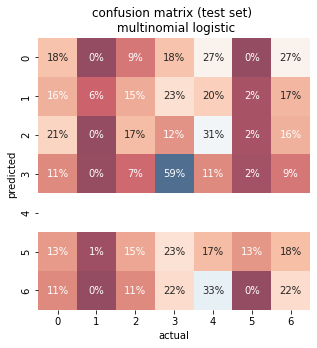

In [45]:

y_hat = clf.predict(x_test)
combination = np.zeros((7, 7))
for i in range(len(y_test)):
    r = y_hat[i]
    c = y_test[i]
    combination[int(r), int(c)] = combination[int(r), int(c)] + 1
combination = combination / combination.sum(axis=1).reshape(-1,1)


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(combination, annot=True, fmt='.0%', cbar=None, cmap='RdBu', alpha=0.7, square=True, ax=ax)
ax.set_title('confusion matrix (test set) \n multinomial logistic')
ax.set_xlabel('actual')
ax.set_ylabel('predicted')



### Test NN

In [111]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import VisionDataset
from PIL import Image



import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from utils import EmotionsDataset

In [99]:
x, y = load_data('../dataset/icml_face_data.csv')
x_train, y_train, _, _, x_test, y_test = split_data(x, y, ratio=(0.8, 0, 0.2))


robust_scaler = sk_prep.RobustScaler()
robust_scaler.fit(x_train)
x_train_robust = robust_scaler.transform(x_train)
x_test_robust = robust_scaler.transform(x_test)
        
normalization = sk_prep.Normalizer()
normalization.fit(x_train_robust)
x_train_robust_norm = normalization.transform(x_train_robust)
x_test_robust_norm = normalization.transform(x_test_robust)



In [105]:
class CustomImageDataset(VisionDataset):
    def __init__(self, 
                 x, 
                 y, 
                 transform = None,
                 target_transform = None,
                 seed: int = 123456789):
        
        self.transform = transform
        self.target_transform = transform
        
        self.rng = np.random.default_rng(seed=seed)
        self.g_cpu = torch.Generator()
        self.g_cpu.manual_seed(seed)
        self.train_idxs = None

        self.targets = y
        self.data = x.reshape(-1, 1, 48, 48)  # one channel, 48x48 image
        self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        
        img, target = self.data[idx], self.targets[idx]
        img = Image.fromarray(img.reshape(48, 48))
        
        if self.transform is not None:
            img = self.transform(img)
            #target = self.target_transform(target)

        return img, target

batch_size = 128

transform = transforms.Compose([transforms.ToTensor()])
dataset_train = CustomImageDataset(x_train_robust_norm, y_train, transform=transform)
dataset_test = CustomImageDataset(x_test_robust_norm, y_test, transform=transform)


trainloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset_test, batch_size=batch_size)

In [112]:
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
dataset_train = EmotionsDataset(root='./dataset', fname='icml_face_data_train.csv', transform=transform)
dataset_test = EmotionsDataset(root='./dataset', fname='icml_face_data_test.csv', transform=transform)

trainloader = DataLoader(dataset_train, batch_size = batch_size,shuffle=True)
testloader = DataLoader(dataset_test, batch_size = batch_size)

Loading dataset...	Done
Loading dataset...	Done


In [114]:
class Face_Emotion_CNN(nn.Module):
    def __init__(self):
        super(Face_Emotion_CNN, self).__init__()
    
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(3,stride=2)
        self.cnn1_bn = nn.BatchNorm2d(32)
        self.cnn2_bn = nn.BatchNorm2d(32)
        self.cnn3_bn = nn.BatchNorm2d(64)
        self.cnn4_bn = nn.BatchNorm2d(128)
    
    
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5,padding=3)
        self.cnn2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=4,padding=2)
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5,padding=3)
        self.cnn4 = nn.Conv2d(in_channels=64, out_channels=128,kernel_size=5,padding=3)

        self.fc1 = nn.Linear(128*3*3, 1024)
        self.fc2 = nn.Linear(1024, 7)
        self.dropout = nn.Dropout(0.3)
        self.log_softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.pool(self.cnn1_bn(self.cnn1(x))))
        #print(x.shape)
        x = self.relu(self.pool(self.cnn2_bn(self.cnn2(x))))
        #print(x.shape)
        x = self.relu(self.pool(self.cnn3_bn(self.cnn3(x))))
        #print(x.shape)
        x = self.relu(self.pool(self.cnn4_bn(self.cnn4(x))))
        #print(x.shape)

        #x = x.view(x.size(0), -1)
        x = x.reshape(x.shape[0], 128 * 3 * 3)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(self.dropout(x)))
        x = self.log_softmax(x)
        return x

model = Face_Emotion_CNN()

In [115]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [116]:
no_epochs = 20
training_loss = []
test_loss = []
test_acc = []
train_acc = []

for epoch in range(no_epochs): 
    running_loss = 0.0
    running_loss_test = 0
    running_loss_train = 0
    correct_test = 0
    total_test = 0
    total_train = 0 
    correct_train = 0
    print(f"Epoch {epoch+1}")
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')

    with torch.no_grad():
        for traindata in trainloader:
            trainimages, trainlabels = traindata
            trainoutputs = model(trainimages)
            loss_train = criterion(trainoutputs, trainlabels)
            running_loss_train += loss_train.item()
            train_, trainpredicted = torch.max(trainoutputs.data, 1)
            total_train += trainlabels.size(0)
            correct_train += (trainpredicted == trainlabels).sum().item()
            
    with torch.no_grad():
        for testdata in testloader:
            testimages, testlabels = testdata
            testoutputs = model(testimages)
            loss_test = criterion(testoutputs, testlabels)
            running_loss_test += loss_test.item()
            test_, testpredicted = torch.max(testoutputs.data, 1)
            total_test += testlabels.size(0)
            correct_test += (testpredicted == testlabels).sum().item()
    
    print(correct_test / total_test)
    training_loss.append(running_loss)
    test_loss.append(running_loss_test)
    test_acc.append(correct_test/total_test)
    train_acc.append(correct_train/total_train)

print('Finished Training')

Epoch 1
0.13346336026748398
Epoch 2
0.13346336026748398
Epoch 3
0.13346336026748398
Epoch 4
0.13346336026748398
Epoch 5
0.13346336026748398
Epoch 6
0.13346336026748398
Epoch 7
0.13346336026748398
Epoch 8
0.13346336026748398
Epoch 9
0.1337419894120925
Epoch 10
0.1558930064084703
Epoch 11
0.19977709668431318
Epoch 12
0.2053496795764837
Epoch 13
0.2128726664809139
Epoch 14
0.20813597102256895
Epoch 15
0.20339927556422402
Epoch 16
0.22025633881303985
Epoch 17
0.21245472276400112
Epoch 18
0.25745332961827805
Epoch 19
0.2709668431317916
Epoch 20
0.2867093898021733
Finished Training


In [117]:
PATH = '../experiments/Kim_model_new_layer_20epoch_mmr.pth'
torch.save(model.state_dict(), PATH)

In [118]:
model = Face_Emotion_CNN()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [119]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 28 %


In [120]:
classes = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Angry is 23.7 %
Accuracy for class: Disgust is 0.0 %
Accuracy for class: Fear  is 31.9 %
Accuracy for class: Happy is 0.0 %
Accuracy for class: Sad   is 53.2 %
Accuracy for class: Surprise is 0.0 %
Accuracy for class: Neutral is 68.2 %


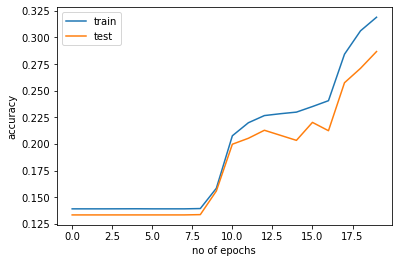

In [121]:
#plt.plot(training_loss)
plt.ylabel("accuracy")
plt.xlabel("no of epochs")
plt.plot(train_acc,label="train")
plt.plot(test_acc,label="test")
plt.legend(["train","test"])


<AxesSubplot:>

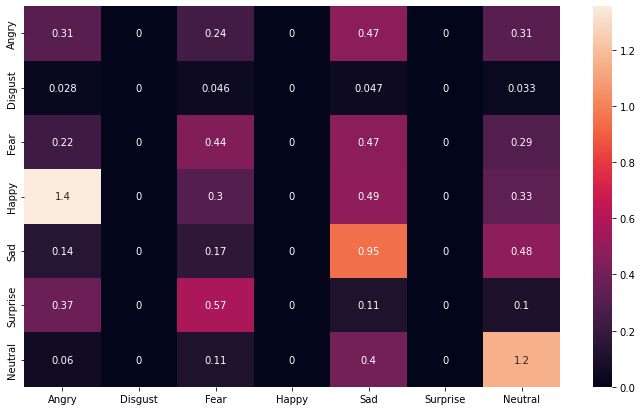

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testloader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth


# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)